<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# import csv


Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:

df = pd.read_csv('data.csv', sep=',')

W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = df.dtypes[df.dtypes == 'object']
numercial = df.dtypes[df.dtypes != 'object']


print('Dane tektowe zawierają kolumny :\n\n', list(categorical.index))
print('Dane numeryczne zawierają kolumny :\n\n', list(numercial.index))

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Dane numeryczne zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [5]:
X = df.drop(['income'],axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [6]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [7]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Value of classification', y_pred)


Value of classification [' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']


Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [8]:

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7939
Test set score: 0.7974


<AxesSubplot: >

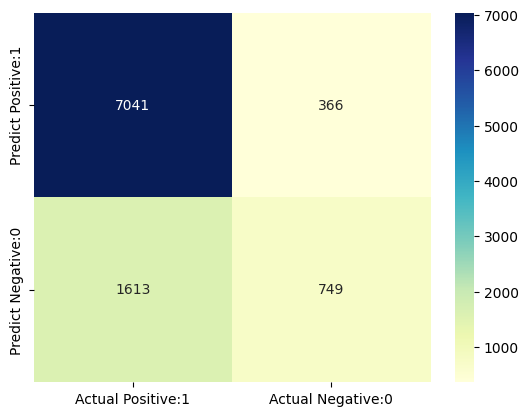

In [9]:
conf_matrix = confusion_matrix(y_test,y_pred)
cm_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        80
 Asian-Pac-Islander       0.04      0.01      0.01       318
              Black       0.33      0.07      0.11       911
              Other       0.00      0.00      0.00        72
              White       0.86      0.98      0.92      8388

           accuracy                           0.85      9769
          macro avg       0.25      0.21      0.21      9769
       weighted avg       0.77      0.85      0.80      9769



c:\Users\barto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\barto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\barto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
#kolumna race
X = df.drop(['race'],axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(f"Wynik klasyfikacji: {y_pred}")
print(f'Dokładność modelu: {accuracy_score(y_test, y_pred)}')

Wynik klasyfikacji: [' White' ' White' ' White' ... ' White' ' White' ' White']
Dokładność modelu: 0.8478861705394616


In [18]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Macierz błędu:\n", conf_matrix)

Macierz błędu:
 [[   0    1    0    0   79]
 [   0    2    1    0  315]
 [   0    4   62    0  845]
 [   0    0    1    0   71]
 [   0   44  125    0 8219]]


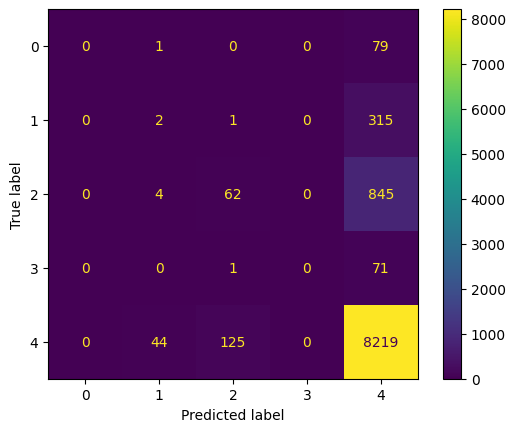

In [19]:
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
matrix_plot.plot()
plt.show()

In [17]:
print("Raport klasyfikatora:")
print(classification_report(y_test, y_pred))

Raport klasyfikatora:
                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        80
 Asian-Pac-Islander       0.04      0.01      0.01       318
              Black       0.33      0.07      0.11       911
              Other       0.00      0.00      0.00        72
              White       0.86      0.98      0.92      8388

           accuracy                           0.85      9769
          macro avg       0.25      0.21      0.21      9769
       weighted avg       0.77      0.85      0.80      9769



c:\Users\barto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\barto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\barto\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#kolumna native country
X = df.drop(['native_country'],axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(f"Wynik klasyfikacji: {y_pred}")

Wynik klasyfikacji: [' Hong' ' Hong' ' Hong' ... ' United-States' ' Hong' ' Hong']


In [22]:
print(f'Dokładność modelu: {accuracy_score(y_test, y_pred)}')

Dokładność modelu: 0.05640290715528713


In [23]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Macierz błędu:\n", conf_matrix)

Macierz błędu:
 [[   0    0    0 ...   11    0   26]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    1    0    4]
 ...
 [   0    0    0 ...  541    0 1188]
 [   0    0    0 ...    2    0    0]
 [   0    0    0 ...    1    0    1]]


In [24]:
print("\nRaport klasyfikatora:\n")
print(classification_report(y_test, y_pred,zero_division=0))


Raport klasyfikatora:

                             precision    recall  f1-score   support

                          ?       0.00      0.00      0.00       169
                   Cambodia       0.00      0.00      0.00         4
                     Canada       0.00      0.00      0.00        37
                      China       0.00      0.00      0.00        17
                   Columbia       0.00      0.00      0.00        13
                       Cuba       0.00      0.00      0.00        25
         Dominican-Republic       0.00      0.00      0.00        23
                    Ecuador       0.00      0.00      0.00         4
                El-Salvador       0.00      0.00      0.00        37
                    England       0.00      0.00      0.00        29
                     France       0.00      0.00      0.00         9
                    Germany       0.00      0.00      0.00        49
                     Greece       0.00      0.00      0.00        10
         

Problem klasyfikacji zależy głównie od zbioru treningowego i wzajmenych zależności między danymi, które są uzależnione od dalej kategorii. Model native_country nie został sklasyfikowany poprawniem, natomiast dla kolumny race dane zotały częściowo dobrze dopasowane.